<a href="https://colab.research.google.com/github/micsupasun/university_of_essex/blob/main/machine_learning/CE802_P2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
# manage data
import pandas as pd
import numpy as np

# vitualization
import seaborn as sns
import matplotlib.pyplot as plt

# delete outlier
from sklearn.neighbors import LocalOutlierFactor

# skip warning
from sklearn import preprocessing
import warnings
warnings.filterwarnings( action= 'ignore')

# train model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection

# tuning parameter
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score

# metric 
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix,accuracy_score



# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df_data = pd.read_csv("/content/gdrive/MyDrive/essex_university/machine_learning/assignment/CE802_P2_Data.csv")
df_test = pd.read_csv("/content/gdrive/MyDrive/essex_university/machine_learning/assignment/CE802_P2_Test.csv")

# Data Processing Data

In [ ]:
df_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-1,45,-7.97,0.54,3,0.50,-113.34,20.30,9.99,20.50,-5.52,3.60,-466.22,1.88,-7.49,True
1,1,27,-7.02,1.08,3,0.85,-47.34,20.00,2.88,19.40,-6.49,1.22,-470.22,0.57,NaN,True
2,-2,0,-8.82,0.56,3,0.45,-152.34,19.62,9.78,20.74,-5.21,2.08,-534.22,5.62,-5.74,False
3,-14,855,-3.23,12.00,30,7.45,-341.34,34.76,-10.14,14.38,-4.79,-2.52,-846.22,-4.17,NaN,True
4,-1,39,-8.12,2.88,3,0.76,-53.34,19.08,6.48,22.58,-7.52,1.24,-512.22,2.17,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-14,840,-1.75,12.90,30,6.70,48.66,36.66,-10.50,12.86,-6.24,-7.78,-496.22,-4.02,NaN,True
1496,-24,390,-3.76,18.40,30,6.15,-131.34,29.96,-6.24,14.24,-4.07,-6.48,-586.22,-2.95,-5.66,False
1497,-14,600,-3.12,10.60,30,7.35,-281.34,33.06,-9.63,10.44,-4.86,-8.82,-596.22,-3.44,-8.03,True
1498,-1,78,-7.90,3.68,3,1.05,-146.34,19.82,14.10,20.02,-5.84,4.22,-514.22,2.57,-8.41,True


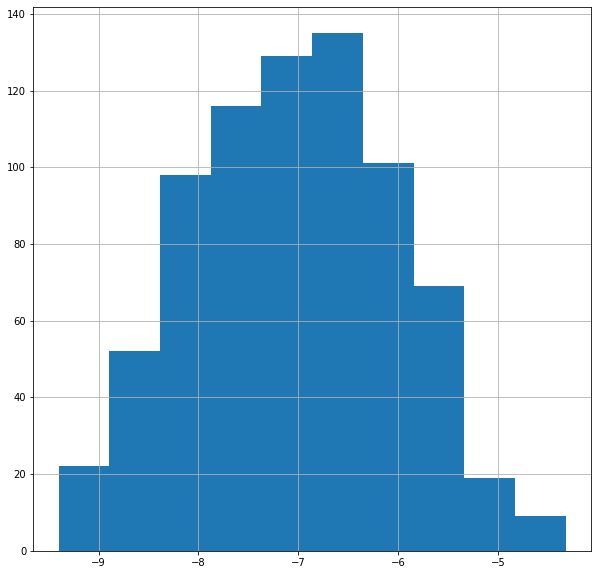

In [ ]:
# column F15 is normalize distribution
df_data['F15'].hist(figsize = (10,10))
plt.show()  

In [ ]:
# fill blank value in column F15. the fill value depend on average column class record
df_data['F15'] = df_data['F15'].fillna(df_data.groupby('Class').transform('mean')['F15'])
df_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-1,45,-7.97,0.54,3,0.50,-113.34,20.30,9.99,20.50,-5.52,3.60,-466.22,1.88,-7.490000,True
1,1,27,-7.02,1.08,3,0.85,-47.34,20.00,2.88,19.40,-6.49,1.22,-470.22,0.57,-7.839099,True
2,-2,0,-8.82,0.56,3,0.45,-152.34,19.62,9.78,20.74,-5.21,2.08,-534.22,5.62,-5.740000,False
3,-14,855,-3.23,12.00,30,7.45,-341.34,34.76,-10.14,14.38,-4.79,-2.52,-846.22,-4.17,-7.839099,True
4,-1,39,-8.12,2.88,3,0.76,-53.34,19.08,6.48,22.58,-7.52,1.24,-512.22,2.17,-6.368498,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-14,840,-1.75,12.90,30,6.70,48.66,36.66,-10.50,12.86,-6.24,-7.78,-496.22,-4.02,-7.839099,True
1496,-24,390,-3.76,18.40,30,6.15,-131.34,29.96,-6.24,14.24,-4.07,-6.48,-586.22,-2.95,-5.660000,False
1497,-14,600,-3.12,10.60,30,7.35,-281.34,33.06,-9.63,10.44,-4.86,-8.82,-596.22,-3.44,-8.030000,True
1498,-1,78,-7.90,3.68,3,1.05,-146.34,19.82,14.10,20.02,-5.84,4.22,-514.22,2.57,-8.410000,True


In [ ]:
# replace False = 0 and True = 1 in column class because we must have lable number to predict
df_data.replace({'Class': {False: 0, True:1}}, inplace=True)
df_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-1,45,-7.97,0.54,3,0.50,-113.34,20.30,9.99,20.50,-5.52,3.60,-466.22,1.88,-7.490000,1
1,1,27,-7.02,1.08,3,0.85,-47.34,20.00,2.88,19.40,-6.49,1.22,-470.22,0.57,-7.839099,1
2,-2,0,-8.82,0.56,3,0.45,-152.34,19.62,9.78,20.74,-5.21,2.08,-534.22,5.62,-5.740000,0
3,-14,855,-3.23,12.00,30,7.45,-341.34,34.76,-10.14,14.38,-4.79,-2.52,-846.22,-4.17,-7.839099,1
4,-1,39,-8.12,2.88,3,0.76,-53.34,19.08,6.48,22.58,-7.52,1.24,-512.22,2.17,-6.368498,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-14,840,-1.75,12.90,30,6.70,48.66,36.66,-10.50,12.86,-6.24,-7.78,-496.22,-4.02,-7.839099,1
1496,-24,390,-3.76,18.40,30,6.15,-131.34,29.96,-6.24,14.24,-4.07,-6.48,-586.22,-2.95,-5.660000,0
1497,-14,600,-3.12,10.60,30,7.35,-281.34,33.06,-9.63,10.44,-4.86,-8.82,-596.22,-3.44,-8.030000,1
1498,-1,78,-7.90,3.68,3,1.05,-146.34,19.82,14.10,20.02,-5.84,4.22,-514.22,2.57,-8.410000,1


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   int64  
 1   F2      1500 non-null   int64  
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   int64  
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  Class   1500 non-null   int64  
dtypes: float64(12), int64(4)
memory usage: 187.6 KB


#Data Processing Test

In [ ]:
# fill blank value in column F15. the fill value depend on average column F15
df_test['F15'] = df_test['F15'].fillna(df_test['F15'].mean())
df_test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-4,765,-3.72,26.40,30,5.15,18.66,31.06,-4.80,15.18,-5.05,-6.56,-766.22,-1.98,-4.670000,NaN
1,-3,3,-7.10,1.20,3,0.36,-119.34,20.00,6.39,19.92,-5.29,0.32,-524.22,2.12,-7.076347,NaN
2,-4,735,-1.70,14.50,30,6.50,183.66,37.36,-11.88,11.22,-7.79,-9.64,-776.22,-3.88,-6.570000,NaN
3,-14,90,-2.55,13.30,30,7.95,-236.34,32.06,-3.09,15.86,-4.33,-8.76,-916.22,-3.41,-7.076347,NaN
4,-1,174,-7.63,3.74,3,0.94,-143.34,19.58,11.67,19.62,-7.63,1.12,-506.22,3.08,-7.076347,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-3,81,-7.20,2.60,3,0.97,-125.34,19.32,4.80,19.44,-6.93,0.10,-498.22,1.22,-7.076347,NaN
1496,1,57,-6.95,2.88,3,0.04,-65.34,20.64,6.87,19.74,-7.63,-0.34,-480.22,2.03,-7.076347,NaN
1497,-1,63,-6.93,1.30,3,0.66,-125.34,20.06,4.50,22.68,-5.60,7.82,-518.22,2.28,-7.340000,NaN
1498,-14,75,-3.16,12.90,30,7.40,-221.34,32.56,-6.60,22.30,-4.03,-7.50,-546.22,-3.40,-8.810000,NaN


# Exploratory Data Analysis

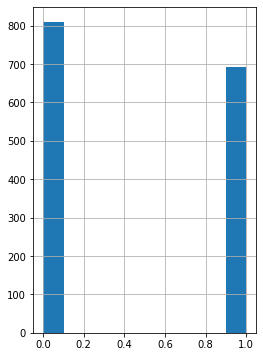

In [ ]:
# It can be seen that the predicted value 0 and the predicted value 1 of the column class are closely related to the balance dataset.
plt.figure(figsize=(4,6))
df_data["Class"].hist()   


<function matplotlib.pyplot.show>

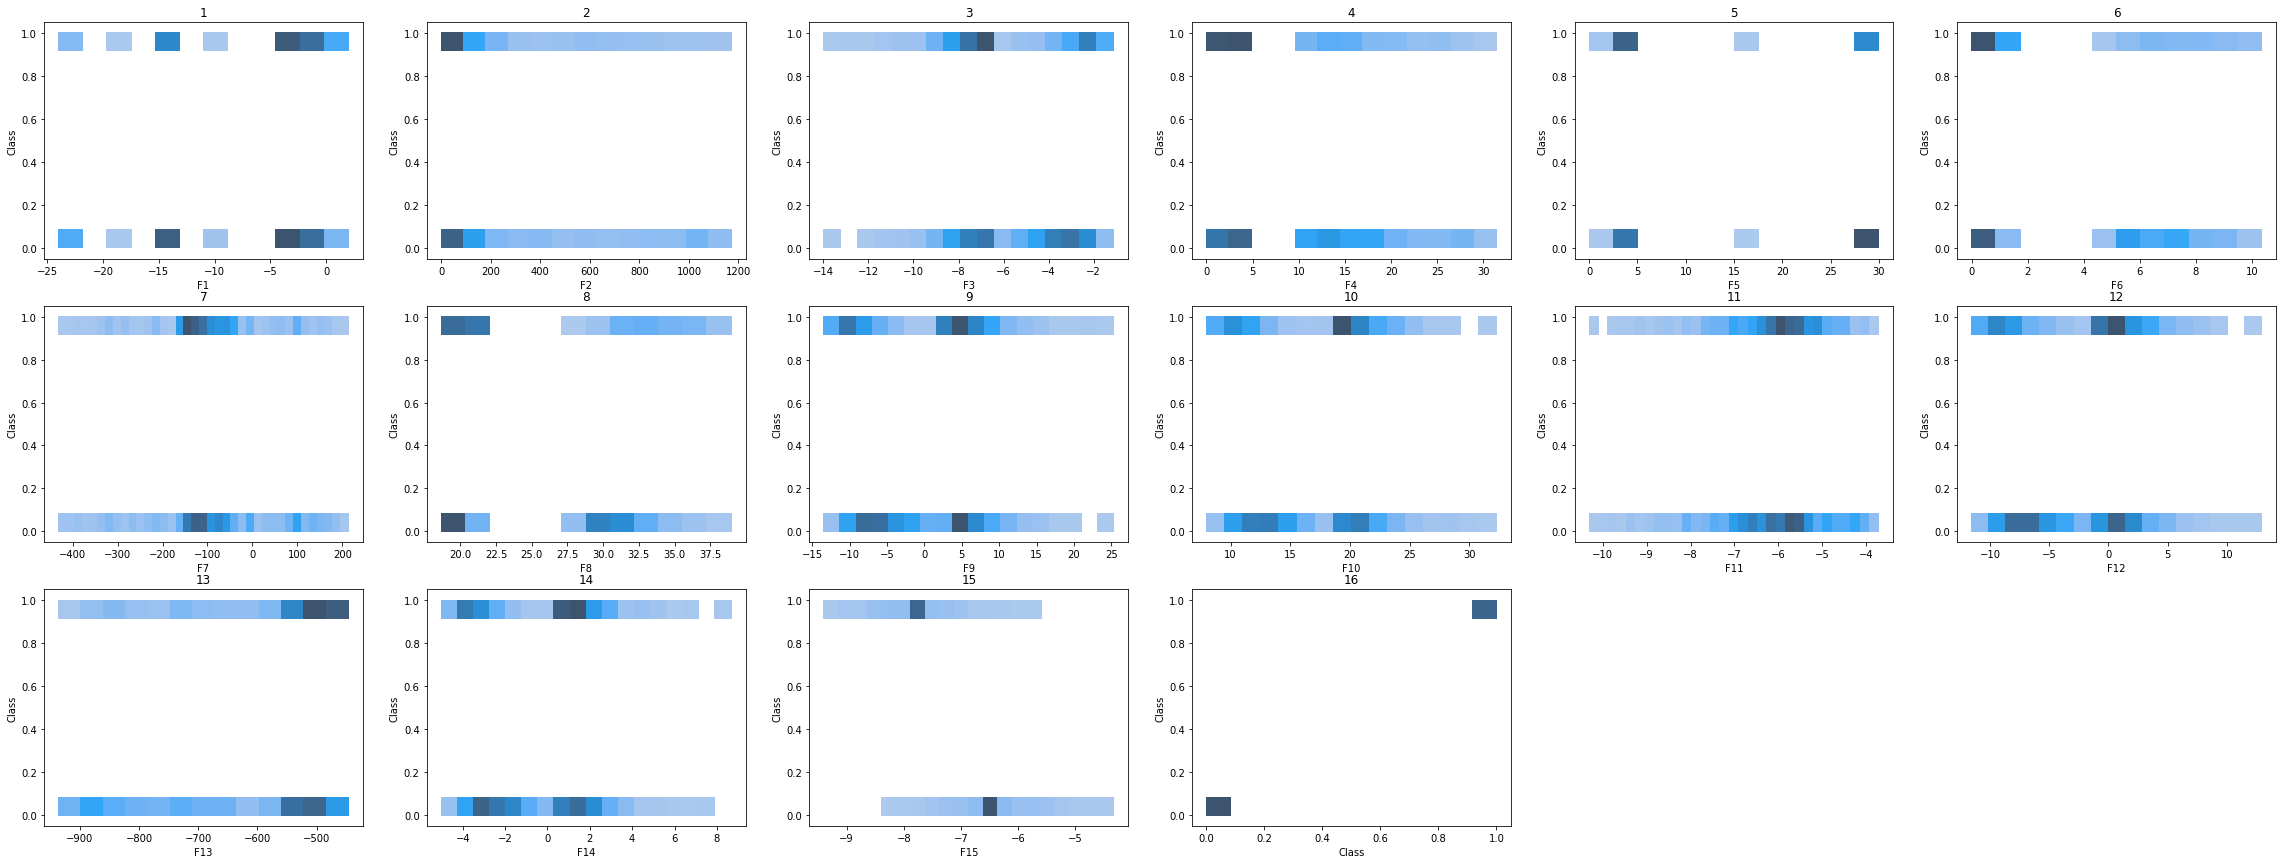

In [ ]:
# This figure shows how the label value affects the feature value.
plt.figure(figsize=(40,20))

for i, column in enumerate(df_data.columns):
  plt.subplot(4,6,i+1)
  sns.histplot(x = df_data[column],y= df_data['Class'])
  plt.title(i+1)
plt.show

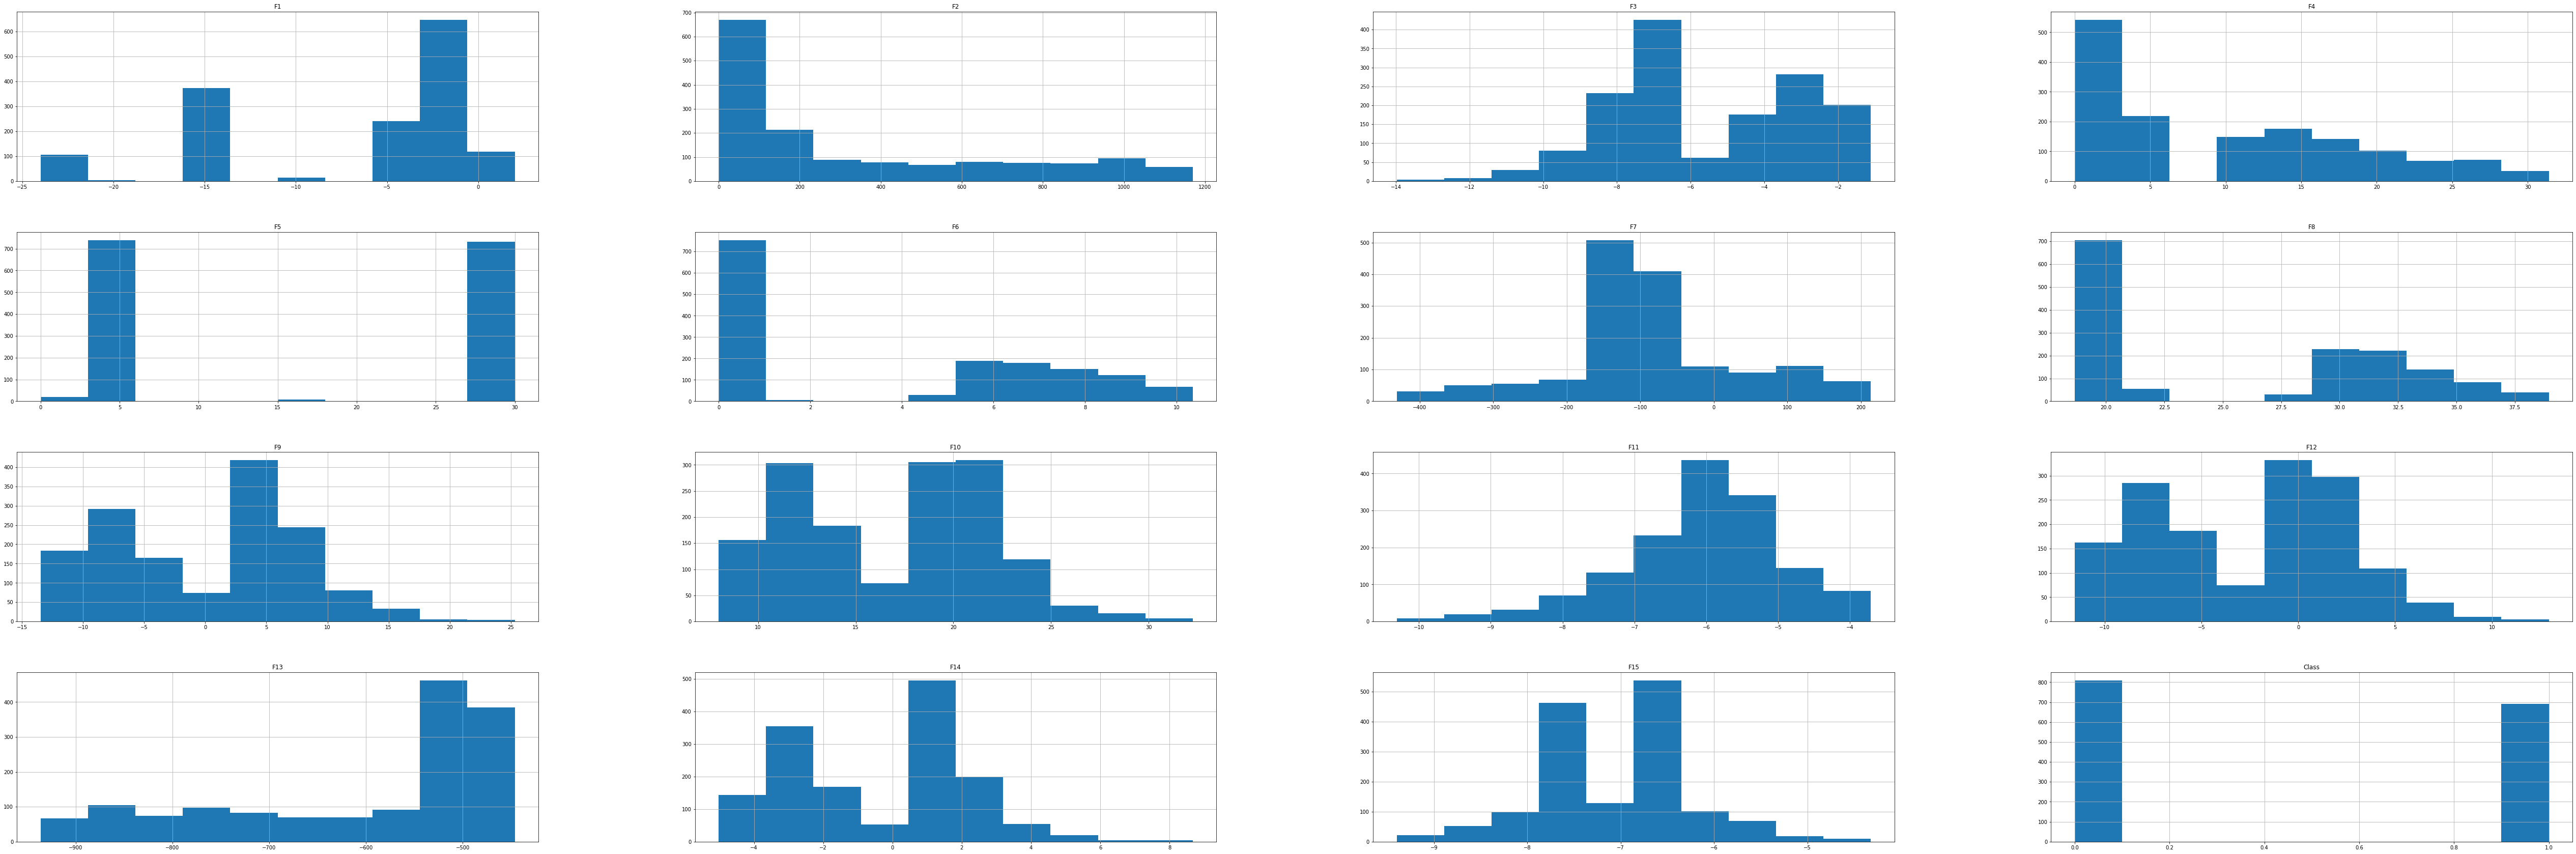

In [ ]:
# show analyze the distribution of data and detect abnormal data characteristics.
df_data.hist(figsize = (90,30))
plt.show()

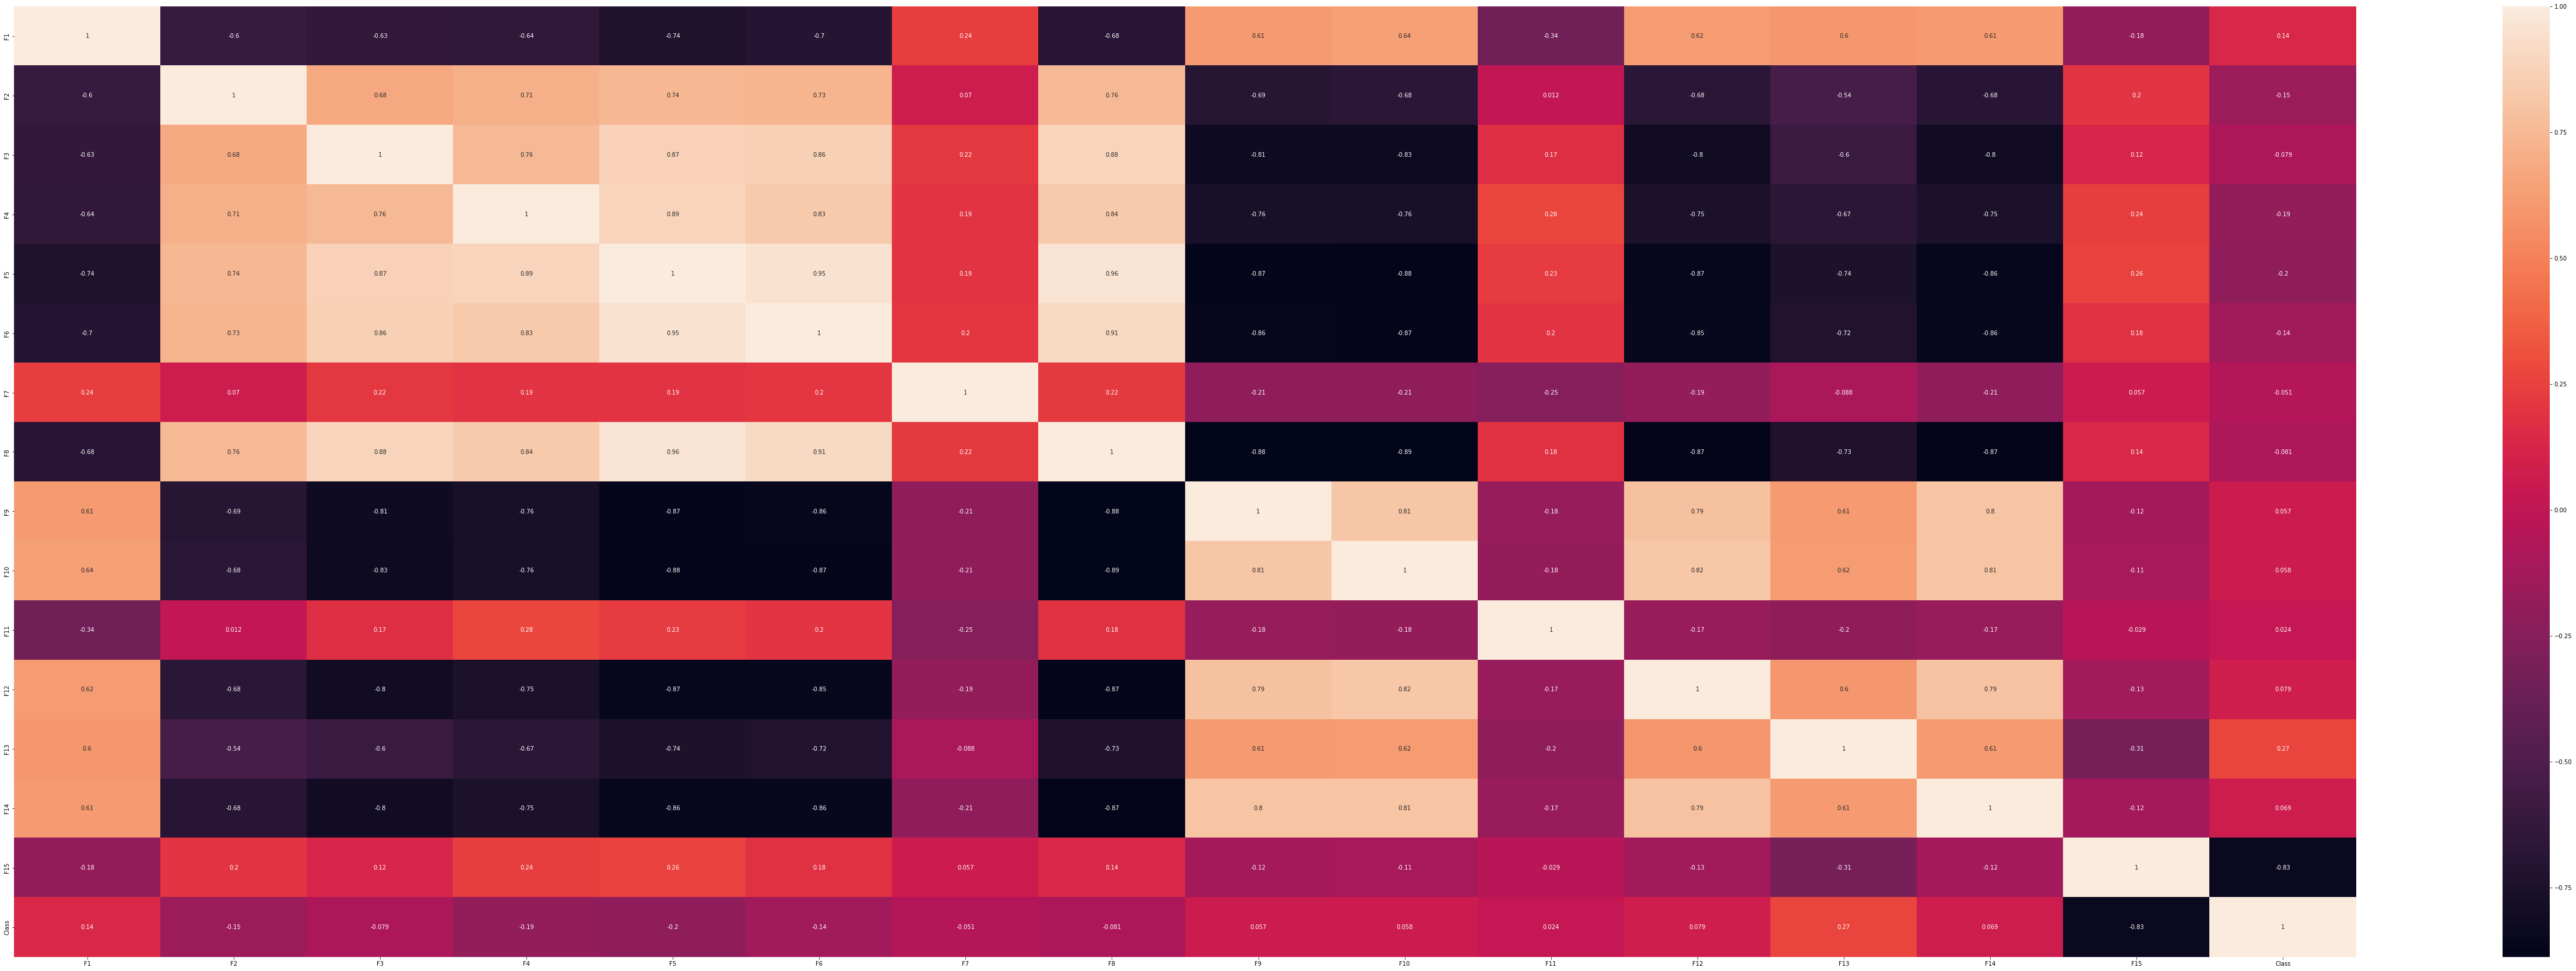

In [ ]:
# trend or correlation information simply by using color pairs, and color intensity represent quantity or frequency, especially data that is near -1 or 1, meaning the two are related.
plt.figure(figsize = (90,30))
data_corr = df_data.corr()
sns.heatmap(data_corr,xticklabels=data_corr.columns,yticklabels=data_corr.columns,annot=True)

In [ ]:
# show correlation not relate
plant_columns = data_corr.columns.tolist()
for i in range(len(plant_columns)):
  correlation_columns = data_corr[f'{data_corr.columns[i]}']
  
  for j in range(len(plant_columns)):
    correleation_row = correlation_columns[j]
    # if (correleation_row < 1 and correleation_row > 0.8) or (correleation_row > -1 and correleation_row < -0.8):
    if (correleation_row < 0.1 and correleation_row > -0.1):
      print(plant_columns[i],plant_columns[j],correleation_row)


F2 F7 0.06996899323244678
F2 F11 0.012291418651195062
F3 Class -0.07910794679238106
F7 F2 0.06996899323244678
F7 F13 -0.08843567562395636
F7 F15 0.056797646764376014
F7 Class -0.05073835106029531
F8 Class -0.08052237695359496
F9 Class 0.05714423066450462
F10 Class 0.05830811019182344
F11 F2 0.012291418651195062
F11 F15 -0.028526153315915036
F11 Class 0.02406429440509294
F12 Class 0.0790350236498064
F13 F7 -0.08843567562395636
F14 Class 0.06879527576917148
F15 F7 0.056797646764376014
F15 F11 -0.028526153315915036
Class F3 -0.07910794679238106
Class F7 -0.05073835106029531
Class F8 -0.08052237695359496
Class F9 0.05714423066450462
Class F10 0.05830811019182344
Class F11 0.02406429440509294
Class F12 0.0790350236498064
Class F14 0.06879527576917148


it can be seen that the most collections are::

F3 F5 0.8737237928969925

F3 F6 0.8618522338944284

F3 F8 0.8848416841822858

F3 F9 -0.813816242338639

F3 F10 -0.8262129615035229

F3 F12 -0.8029949986209519

F3 F14 -0.8041915936431431

F4 F5 0.8889766211301563

F4 F6 0.8342460480644419

F4 F8 0.8373646143216096

F5 F6 0.9548403537384663

F5 F8 0.9566398870632993

F5 F9 -0.8685278468430179

F5 F10 -0.8772933951382053

F5 F12 -0.8651087566959327

F5 F14 -0.8630273541677465

F6 F8 0.906307126879878

F6 F9 -0.8634344422096841

F6 F10 -0.8673053701129199

F6 F12 -0.8543777172482715

F6 F14 -0.8555360646504322

F8 F9 -0.8833490909729538

F8 F10 -0.8875004874532119

F8 F12 -0.8734282223333227

F8 F14 -0.8735952992976702

F9 F10 0.8094728563927953

F9 F14 0.8045452428386021

F10 F12 0.8181053985612573

F10 F14 0.8076783882784531

F15 Class -0.8335763283928131

The least colleration is

F2 F7 0.06996899323244678

F2 F11 0.012291418651195062

F3 Class -0.07910794679238106

F7 F13 -0.08843567562395636

F7 F15 0.056797646764376014

F7 Class -0.05073835106029531

F8 Class -0.08052237695359496

F9 Class 0.05714423066450462

F10 Class 0.05830811019182344

F11 F15 -0.028526153315915036

F11 Class 0.02406429440509294

F12 Class 0.0790350236498064

F14 Class 0.06879527576917148



In [ ]:
df_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
count,1500.000000,1500.00000,1500.000000,1500.00000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-6.638000,327.07400,-5.583260,9.93752,16.21000,3.854280,-88.098000,26.035627,0.224600,16.934107,-6.072353,-2.524933,-605.110667,-0.361213,-7.045955,0.460667
std,7.159315,352.00374,2.554271,8.65042,13.51472,3.465276,120.565344,6.333818,7.635517,5.027699,1.108964,4.982472,142.833748,2.540644,0.879663,0.498617
min,-24.000000,0.00000,-13.980000,0.00000,0.00000,0.000000,-431.340000,18.660000,-13.470000,7.980000,-10.310000,-11.540000,-936.220000,-5.020000,-9.400000,0.000000
25%,-14.000000,45.00000,-7.480000,2.48000,3.00000,0.600000,-143.340000,20.100000,-7.140000,12.120000,-6.650000,-7.280000,-726.220000,-2.840000,-7.839099,0.000000
50%,-3.000000,150.00000,-6.580000,4.14000,3.00000,1.020000,-104.340000,20.820000,3.195000,18.900000,-5.920000,-0.620000,-534.220000,0.620000,-6.950000,0.000000
75%,-1.000000,585.00000,-3.087500,16.40000,30.00000,7.050000,-41.340000,31.560000,5.880000,20.820000,-5.420000,1.145000,-494.220000,1.520000,-6.368498,1.000000
max,2.000000,1170.00000,-1.110000,31.40000,30.00000,10.350000,213.660000,38.960000,25.320000,32.260000,-3.710000,12.940000,-446.220000,8.670000,-4.320000,1.000000


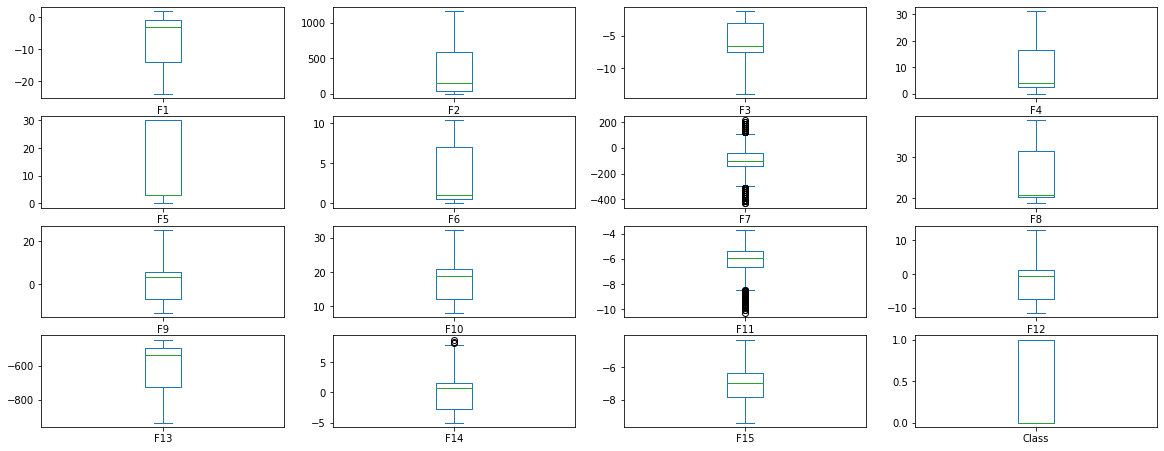

In [ ]:
# show box plot to find outlier
df_data.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()

# Feature Engineering

In [ ]:
# delete outlier because in box plot we have outlier in f3,f10,14
OutlierFactor = LocalOutlierFactor()
predict_outlier = OutlierFactor.fit_predict(df_data)
df_data['check_outlier'] = predict_outlier.tolist()
df_data = df_data[df_data['check_outlier'] == 1].reset_index(drop=True).drop(['check_outlier'], axis=1)
df_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-1,45,-7.97,0.54,3,0.50,-113.34,20.30,9.99,20.50,-5.52,3.60,-466.22,1.88,-7.490000,1
1,1,27,-7.02,1.08,3,0.85,-47.34,20.00,2.88,19.40,-6.49,1.22,-470.22,0.57,-7.839099,1
2,-2,0,-8.82,0.56,3,0.45,-152.34,19.62,9.78,20.74,-5.21,2.08,-534.22,5.62,-5.740000,0
3,-14,855,-3.23,12.00,30,7.45,-341.34,34.76,-10.14,14.38,-4.79,-2.52,-846.22,-4.17,-7.839099,1
4,-1,39,-8.12,2.88,3,0.76,-53.34,19.08,6.48,22.58,-7.52,1.24,-512.22,2.17,-6.368498,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,-14,840,-1.75,12.90,30,6.70,48.66,36.66,-10.50,12.86,-6.24,-7.78,-496.22,-4.02,-7.839099,1
1472,-24,390,-3.76,18.40,30,6.15,-131.34,29.96,-6.24,14.24,-4.07,-6.48,-586.22,-2.95,-5.660000,0
1473,-14,600,-3.12,10.60,30,7.35,-281.34,33.06,-9.63,10.44,-4.86,-8.82,-596.22,-3.44,-8.030000,1
1474,-1,78,-7.90,3.68,3,1.05,-146.34,19.82,14.10,20.02,-5.84,4.22,-514.22,2.57,-8.410000,1


#train_test_split

In [ ]:
# train test split to protect data overfitting
features = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15']
X = df_data.loc[:, features].to_numpy()
y = df_data.loc[:, 'Class'].to_numpy()
print(X.shape, y.shape)

(1476, 15) (1476,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=300)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1180, 15), (296, 15), (1180,), (296,))

scalar

In [ ]:
# Min max is used when we want to scale all the columns between same value like -1,1
# Standard scaler takes mean as 0 and then scale all the data according to  the unit variance.
# Robust will first remove outliers
robust_scaler = preprocessing.RobustScaler()
robust_fit_transform = robust_scaler.fit_transform(X_train)

min_max_scaler = preprocessing.MinMaxScaler()
minmax_fit_transform = min_max_scaler.fit_transform(X_train)

standard_scaler = preprocessing.StandardScaler()
standard_fit_transform = standard_scaler.fit_transform(X_train)

Text(0.5, 1.0, 'robust_scaler')

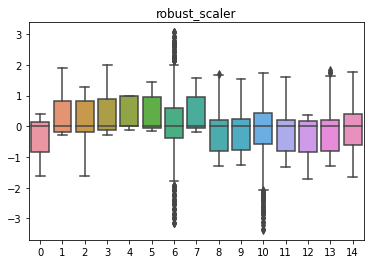

In [ ]:
sns.boxplot(data=robust_fit_transform)
plt.title('robust_scaler')

Text(0.5, 1.0, 'min_max_scaler')

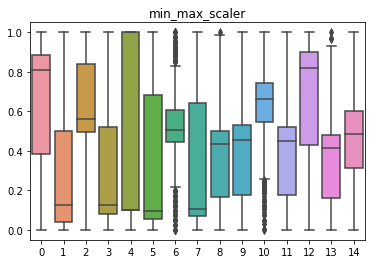

In [ ]:
sns.boxplot(data=minmax_fit_transform)
plt.title('min_max_scaler')

Text(0.5, 1.0, 'standard_fit_transform')

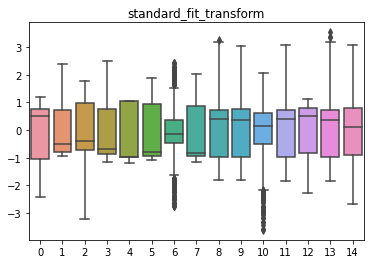

In [ ]:
sns.boxplot(data=standard_fit_transform)
plt.title('standard_fit_transform')

it can be seen that in vitualization the best scalar is StandardScaler

In [ ]:
standard_scaler = preprocessing.StandardScaler()
X_train_scalar = standard_scaler.fit_transform(X_train)
# y_train_scalar = standard_scaler.fit_transform(y_train)
X_test_scalar = standard_scaler.fit_transform(X_test)
# y_test_scalar = standard_scaler.fit_transform(y_test)
print(X_train_scalar.shape,X_test_scalar.shape)

(1180, 15) (296, 15)


In [ ]:
# X_test_scalar, y_test
model = DecisionTreeClassifier()

kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold)
model.fit(X_train_scalar, y_train)

y_pred_model =model.predict(X_test_scalar)
print(y_pred_model)
print('===============')
print(y_test)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0
 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0
 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1
 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0
 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1]
[0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0
 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1
 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0
 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1
 1 0 0 1 0 1 0 0 0 0 0 0

# Train multiple model with default parameter

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       161
           1       0.81      0.93      0.87       135

    accuracy                           0.87       296
   macro avg       0.87      0.87      0.87       296
weighted avg       0.88      0.87      0.87       296

accuracy_score_DecisionTreeClassifier: 0.8682432432432432


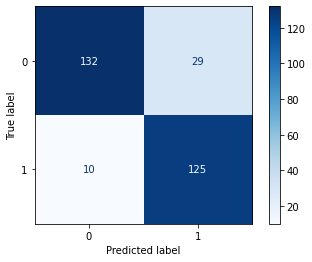

LogisticRegression
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       161
           1       0.93      0.95      0.94       135

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

accuracy_score_LogisticRegression: 0.9459459459459459


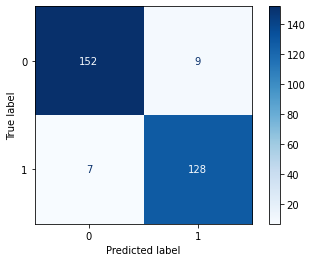

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       161
           1       0.93      0.95      0.94       135

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

accuracy_score_RandomForestClassifier: 0.9459459459459459


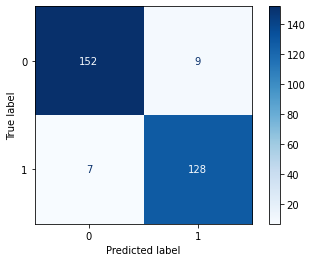

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       161
           1       0.94      0.94      0.94       135

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

accuracy_score_KNeighborsClassifier: 0.9459459459459459


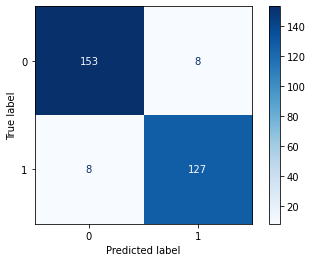

SVC
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       161
           1       0.94      0.96      0.95       135

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296

accuracy_score_SVC: 0.956081081081081


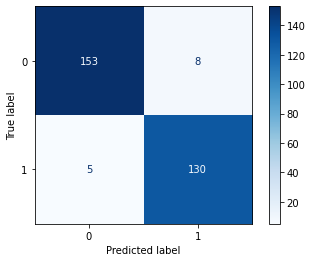

GaussianNB
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       161
           1       0.89      0.89      0.89       135

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296

accuracy_score_GaussianNB: 0.8986486486486487


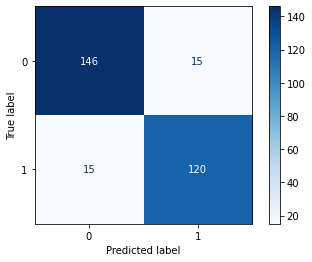

XGBClassifier
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       161
           1       0.92      0.95      0.93       135

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

accuracy_score_XGBClassifier: 0.9391891891891891


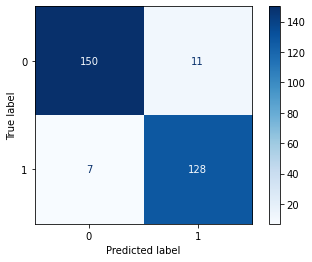

SGDClassifier
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       161
           1       0.89      0.89      0.89       135

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296

accuracy_score_SGDClassifier: 0.8986486486486487


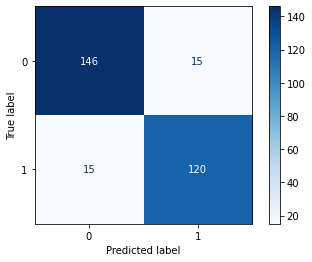

MLPClassifier
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       161
           1       0.95      0.96      0.96       135

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296

accuracy_score_MLPClassifier: 0.9594594594594594


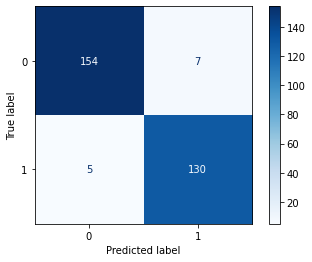

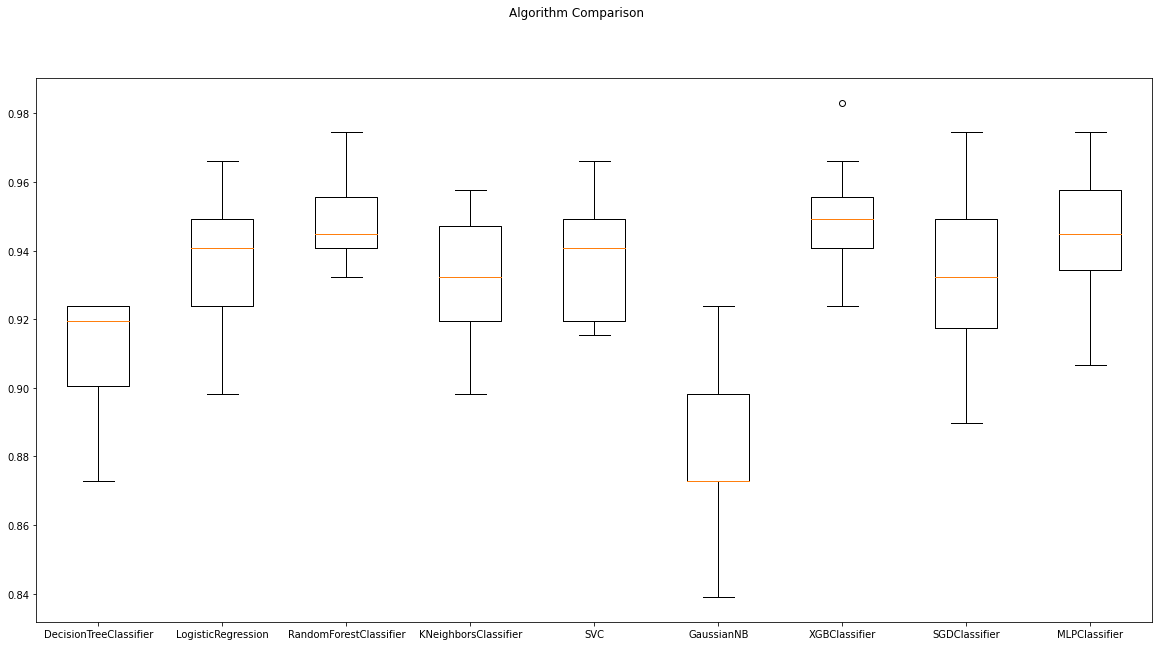

,name_model,mean_score_model,std_score_model,accuracy_score
0,DecisionTreeClassifier,0.910169,0.017034,0.868243
1,LogisticRegression,0.937288,0.019025,0.945946
2,RandomForestClassifier,0.949153,0.014678,0.945946
3,KNeighborsClassifier,0.933051,0.018353,0.945946
4,SVC,0.938136,0.017388,0.956081
5,GaussianNB,0.879661,0.026203,0.898649
6,XGBClassifier,0.949153,0.016079,0.939189
7,SGDClassifier,0.931356,0.024693,0.898649
8,MLPClassifier,0.944915,0.021523,0.959459


In [ ]:
# add all model classification
models = []
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('GaussianNB', GaussianNB()))
models.append(('XGBClassifier', XGBClassifier()))
models.append(('SGDClassifier', SGDClassifier()))
models.append(('MLPClassifier', MLPClassifier()))


all_name_model = []
all_mean_score = []
all_std_score = []
list_temp_accuracy_score = []

# evaluate each model in turn
results = []
names = []

for name, model in models:
  # cross validation
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold)
  model.fit(X_train_scalar, y_train)
  # predict y value
  y_pred_model =model.predict(X_test_scalar)
  results.append(cv_results)
  names.append(name)
  all_name_model.append(name)
  # cross validation mean score
  all_mean_score.append(cv_results.mean())
  # cross validation std score
  all_std_score.append(cv_results.std())
  print(name)
  # classification_report
  print(classification_report(y_test, y_pred_model))
  # accuracy score
  print(f'accuracy_score_{name}:',accuracy_score(y_test, y_pred_model))
  list_temp_accuracy_score.append(accuracy_score(y_test, y_pred_model))
  # confusion_matrix
  plot_confusion_matrix(model, X_test_scalar, y_test,cmap="Blues")
  plt.show()
# boxplot algorithm comparison
fig = plt.figure(figsize = (20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
# plt.figure(figsize = (90,30))
plt.show()
# data frame comparison
df_origin_predict = pd.DataFrame({
    'name_model' : all_name_model,
    'mean_score_model' : all_mean_score,
    'std_score_model' : all_std_score,
    'accuracy_score':list_temp_accuracy_score
})
display(df_origin_predict)

# tuning Parameter

In [ ]:
# models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
# models.append(('LogisticRegression', LogisticRegression()))
# models.append(('RandomForestClassifier', RandomForestClassifier()))
# models.append(('KNeighborsClassifier', KNeighborsClassifier()))
# models.append(('SVC', SVC()))
# models.append(('GaussianNB', GaussianNB()))
# models.append(('XGBClassifier', XGBClassifier()))
# models.append(('SGDClassifier', SGDClassifier()))

# all model and tuning parameter
model_params = {
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion': ["gini", "entropy"],
            'splitter': ["best","random"],
            'max_depth': [3,5,None],
            'min_samples_split': [2,4,8],
            'min_samples_leaf': [1,2,4],
            'max_features':['auto','sqrt','log2']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params' : {
            'penalty': ['l1','l2','elasticnet','none'],
            'dual': [True,False],
            'fit_intercept': [True,False],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'max_iter': [100,200,400,800],
            'multi_class': ['auto','ovr','multinomial'],
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [100,400,700,1000],
            'max_features': ["auto", "sqrt"],
            'max_depth' : [3,5,None],
            'min_samples_split' : [2, 5, 10],
            'min_samples_leaf' : [1, 2, 4],
            'bootstrap': [True, False],
        }  
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [5,7,9],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p': [1,2],
        }  
    },
    'SVC': {
        'model': SVC(),
        'params' : {
            'gamma': ['scale','auto'],
            'shrinking':[True,False],
            'probability':[True,False],
            'verbose':[True,False],
            'decision_function_shape': ['ovo','ovr'],
            'break_ties':[True,False],
        }  
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params' : {
            'priors':[0.1,0.5, 0.9,None],
        }  
    },
    'XGBClassifier': {
        'model': XGBClassifier(),
        'params' : {
            'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15 ],
            'learning_rate': [ 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
            'n_estimators': [ 50, 75, 100, 125, 150 ],
            'min_child_weight': [ 1, 3, 5, 7 ],
            'gamma': [ 0.0, 0.1, 0.2, 0.3, 0.4 ],
            'colsample_bytree': [ 0.3, 0.4, 0.5, 0.7 ] 
        }  
    },
    'SGDClassifier': {
        'model': SGDClassifier(),
        'params' : {
            'penalty': ['l2', 'l1', 'elasticnet'],
            'l1_ratio': [0.15,0.50,0.85],
            'fit_intercept': [True,False],
            'max_iter': [1000,2000,4000],
            'shuffle': [True,False],
            'learning_rate': ['constant','optimal','invscaling','adaptive'],

        }
    },   
    'MLPClassifier' : {
        'model': MLPClassifier(),
        'params': {
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['lbfgs', 'sgd', 'adam'],
            'power_t': [0.1,0.5,0.8],
            'max_iter': [200,800,1600],
            'shuffle': [True,False],
            'verbose': [True,False],
            'warm_start': [True,False],
            'nesterovs_momentum': [True,False],
            'early_stopping': [True,False],
            'validation_fraction': [0.1,0.5,0.8]
        }
    },
}

scores = []

for model_name, mp in model_params.items():
  print(mp['model'], mp['params'])
  # use RandomizedSearchCV instead GridSearchCV because it is fast
  random_search = RandomizedSearchCV(
    estimator = mp['model'],
    param_distributions= mp['params'],
    n_iter=100,
    cv=5,
  )

  
  # random_search = GridSearchCV(
  #   estimator = mp['model'],
  #   param_grid= mp['params'],
  #   cv=5,
  # )

  random_search.fit(X_train_scalar,y_train)
  scores.append({
      'model': model_name,
      'best_score': random_search.best_score_,
      'best_params': random_search.best_params_,
      'best_estimator':random_search.best_estimator_
  })
# show accuracy, best_parameter and best_estimator in each model
df_random_search_cv = pd.DataFrame(scores,columns=['model','best_score','best_params','best_estimator'])
df_random_search_cv


Streaming output truncated to the last 5000 lines.
Iteration 165, loss = 0.13417933
Iteration 166, loss = 0.13340597
Iteration 167, loss = 0.13352980
Iteration 168, loss = 0.13302343
Iteration 169, loss = 0.13273049
Iteration 170, loss = 0.13269752
Iteration 171, loss = 0.13209092
Iteration 172, loss = 0.13214667
Iteration 173, loss = 0.13232486
Iteration 174, loss = 0.13165710
Iteration 175, loss = 0.13158529
Iteration 176, loss = 0.13118605
Iteration 177, loss = 0.13102950
Iteration 178, loss = 0.13069621
Iteration 179, loss = 0.13063741
Iteration 180, loss = 0.13018739
Iteration 181, loss = 0.13012199
Iteration 182, loss = 0.13051649
Iteration 183, loss = 0.12994799
Iteration 184, loss = 0.12976653
Iteration 185, loss = 0.12898294
Iteration 186, loss = 0.12889458
Iteration 187, loss = 0.12906288
Iteration 188, loss = 0.12845374
Iteration 189, loss = 0.12858658
Iteration 190, loss = 0.12820649
Iteration 191, loss = 0.12787544
Iteration 192, loss = 0.12779796
Iteration 193, loss = 0.1

,model,best_score,best_params,best_estimator
0,DecisionTreeClassifier,0.896610,"{'splitter': 'best', 'min_samples_split': 4, '...","DecisionTreeClassifier(max_features='auto', mi..."
1,LogisticRegression,0.939831,"{'solver': 'saga', 'penalty': 'none', 'multi_c...","LogisticRegression(max_iter=400, multi_class='..."
2,RandomForestClassifier,0.950847,"{'n_estimators': 400, 'min_samples_split': 10,...","(DecisionTreeClassifier(max_features='auto', m..."
3,KNeighborsClassifier,0.938136,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...","KNeighborsClassifier(n_neighbors=7, p=1)"
4,SVC,0.937288,"{'verbose': True, 'shrinking': True, 'probabil...","SVC(break_ties=True, probability=True, verbose..."
5,GaussianNB,0.885593,{'priors': None},GaussianNB()
6,XGBClassifier,0.955085,"{'n_estimators': 75, 'min_child_weight': 5, 'm...","XGBClassifier(colsample_bytree=0.3, gamma=0.2,..."
7,SGDClassifier,0.943220,"{'shuffle': True, 'penalty': 'l1', 'max_iter':...","SGDClassifier(l1_ratio=0.85, max_iter=2000, pe..."
8,MLPClassifier,0.952542,"{'warm_start': True, 'verbose': False, 'valida...","MLPClassifier(activation='tanh', max_iter=800,..."


# Evaluation Multiple Model with tuning parameter

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       161
           1       0.69      0.60      0.64       135

    accuracy                           0.70       296
   macro avg       0.70      0.69      0.69       296
weighted avg       0.70      0.70      0.69       296

accuracy_score_DecisionTreeClassifier: 0.6959459459459459


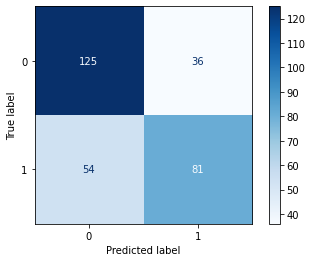

LogisticRegression
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       161
           1       0.95      0.96      0.95       135

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296

accuracy_score_LogisticRegression: 0.956081081081081


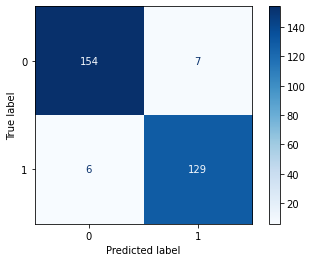

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       161
           1       0.92      0.94      0.93       135

    accuracy                           0.94       296
   macro avg       0.93      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

accuracy_score_RandomForestClassifier: 0.9358108108108109


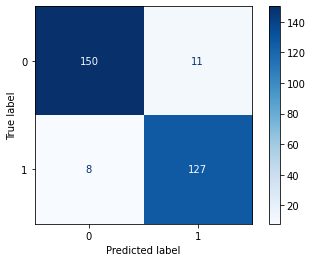

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       161
           1       0.94      0.96      0.95       135

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

accuracy_score_KNeighborsClassifier: 0.9527027027027027


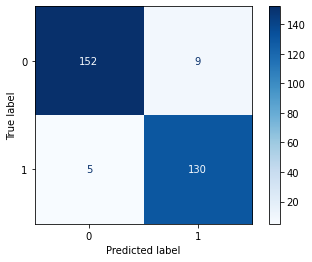

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]SVC
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       161
           1       0.94      0.96      0.95       135

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296

accuracy_score_SVC: 0.956081081081081


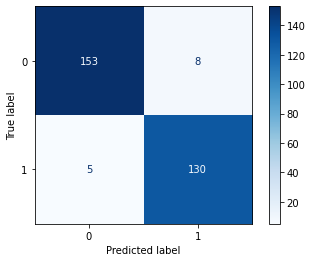

GaussianNB
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       161
           1       0.89      0.89      0.89       135

    accuracy                           0.90       296
   macro avg       0.90      0.90      0.90       296
weighted avg       0.90      0.90      0.90       296

accuracy_score_GaussianNB: 0.8986486486486487


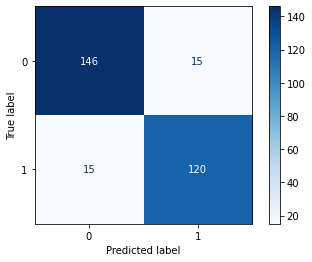

XGBClassifier
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       161
           1       0.93      0.95      0.94       135

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

accuracy_score_XGBClassifier: 0.9459459459459459


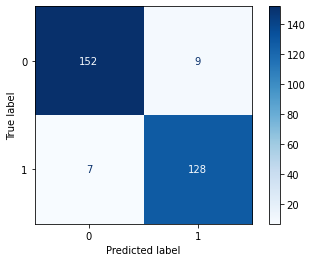

SGDClassifier
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       161
           1       0.94      0.95      0.94       135

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

accuracy_score_SGDClassifier: 0.9493243243243243


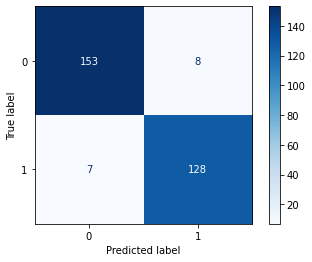

MLPClassifier
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       161
           1       0.96      0.98      0.97       135

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296

accuracy_score_MLPClassifier: 0.972972972972973


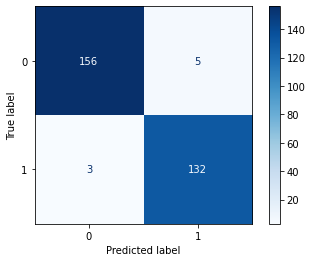

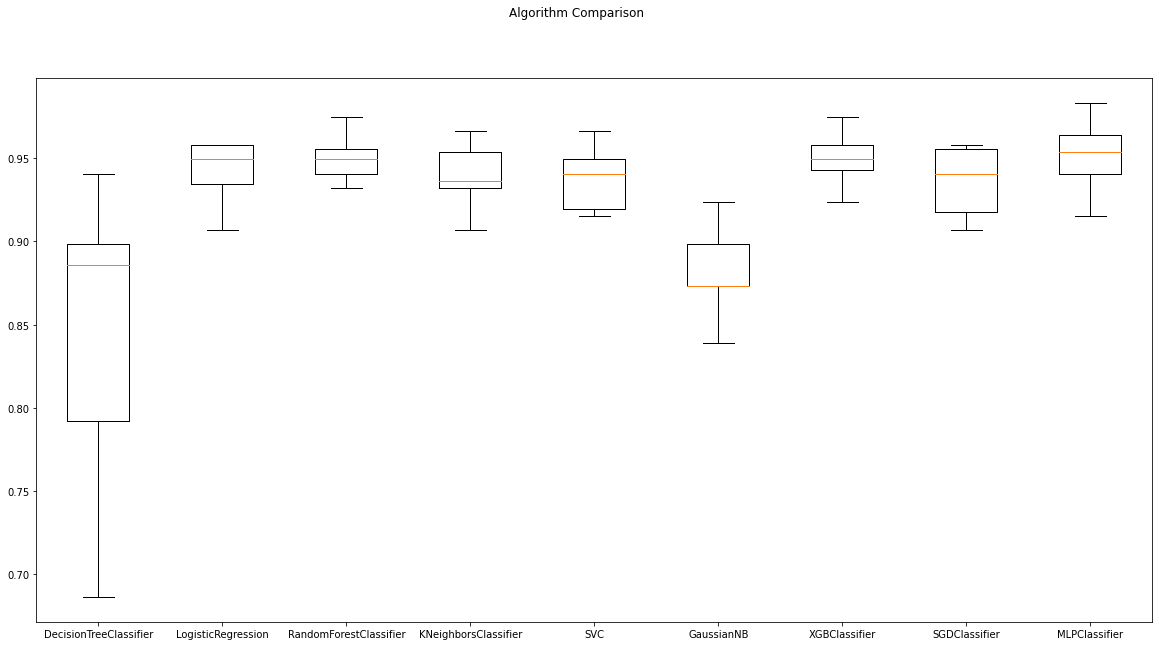

,name_model,mean_score_model,std_score_model,accuracy_score
0,DecisionTreeClassifier,0.849153,0.079661,0.695946
1,LogisticRegression,0.943220,0.016542,0.956081
2,RandomForestClassifier,0.949153,0.011370,0.935811
3,KNeighborsClassifier,0.938983,0.016864,0.952703
4,SVC,0.938136,0.017388,0.956081
5,GaussianNB,0.879661,0.026203,0.898649
6,XGBClassifier,0.949153,0.015626,0.945946
7,SGDClassifier,0.936441,0.018663,0.949324
8,MLPClassifier,0.952542,0.018644,0.972973


In [ ]:

models = []
# add tuning parameter in all model
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(splitter='best', min_samples_split= 8, min_samples_leaf= 4, max_features = 'auto', max_depth = 5, criterion ='gini')))
models.append(('LogisticRegression', LogisticRegression(solver= 'sag', penalty= 'none', multi_class= 'ovr', max_iter= 100, fit_intercept= True, dual= False)))
models.append(('RandomForestClassifier', RandomForestClassifier(n_estimators= 700, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= None, bootstrap= True)))
models.append(('KNeighborsClassifier', KNeighborsClassifier(weights= 'uniform', p= 1, n_neighbors= 7, algorithm= 'auto')))
models.append(('SVC', SVC(verbose= True, shrinking= True, probability= True, gamma= 'scale', decision_function_shape= 'ovr', break_ties= True)))
models.append(('GaussianNB', GaussianNB(priors = None)))
models.append(('XGBClassifier', XGBClassifier(n_estimators= 75, min_child_weight= 3, max_depth= 6, learning_rate= 0.3, gamma= 0.3, colsample_bytree= 0.3)))
models.append(('SGDClassifier', SGDClassifier(shuffle= True, penalty= 'l1', max_iter= 2000, learning_rate= 'optimal', l1_ratio= 0.15, fit_intercept= True)))
models.append(('MLPClassifier', MLPClassifier(warm_start = True, verbose= False, validation_fraction= 0.1, solver= 'adam', shuffle= False, power_t= 0.1, nesterovs_momentum= True, max_iter= 1600, early_stopping= False, activation= 'tanh')))

all_name_model = []
all_mean_score = []
all_std_score = []
list_temp_accuracy_score = []

# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  # cross_validation
  cv_results = model_selection.cross_val_score(model, X_train_scalar, y_train, cv=kfold)
  model.fit(X_train_scalar, y_train)
  # predict y hat value
  y_pred_model =model.predict(X_test_scalar)
  results.append(cv_results)
  names.append(name)
  all_name_model.append(name)
  # mean of cross validation
  all_mean_score.append(cv_results.mean())
  # std of cross validation
  all_std_score.append(cv_results.std())
  print(name)
  # classification_report
  print(classification_report(y_test, y_pred_model))
  # accuracy_score
  print(f'accuracy_score_{name}:',accuracy_score(y_test, y_pred_model))
  list_temp_accuracy_score.append(accuracy_score(y_test, y_pred_model))
  # confusion_matrix
  plot_confusion_matrix(model, X_test_scalar, y_test,cmap="Blues")
  plt.show()
# boxplot algorithm comparison
fig = plt.figure(figsize = (20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
# plt.figure(figsize = (90,30))
plt.show()
# dataframe algorithm comparison
df_origin_predict = pd.DataFrame({
    'name_model' : all_name_model,
    'mean_score_model' : all_mean_score,
    'std_score_model' : all_std_score,
    'accuracy_score':list_temp_accuracy_score
})
display(df_origin_predict)

It can be seen that the model has The highest accuracy_score is MLPClassifier, and the confusion_matrix error is 8.

scores: .0.950847 +/- .0.020339
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       161
           1       0.96      0.98      0.97       135

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



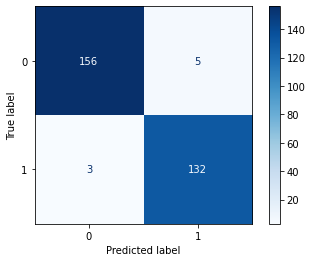

In [ ]:
# the best model is MLPClassifier and we use the best model to perdict out put
the_best_model = MLPClassifier(warm_start = True, verbose= False, validation_fraction= 0.1, solver= 'adam', shuffle= False, power_t= 0.1, nesterovs_momentum= True, max_iter= 1600, early_stopping= False, activation= 'tanh')
the_best_model.fit(X_train_scalar, y_train)
kfold = model_selection.KFold(n_splits=10)
scores = model_selection.cross_val_score(the_best_model, X_train_scalar, y_train, cv=kfold)
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print(classification_report(y_test, the_best_model.predict(X_test_scalar)))
plot_confusion_matrix(the_best_model, X_test_scalar, y_test,cmap="Blues")

# Feature Important

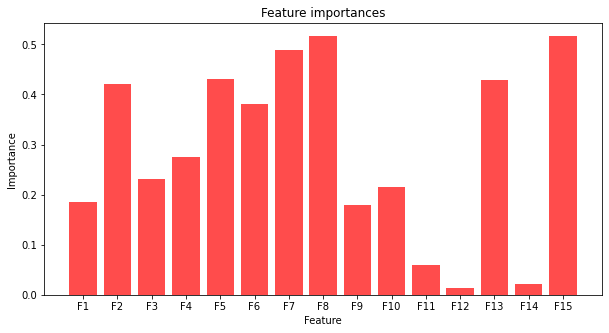

In [ ]:
# virtualization feature importances
def get_feature_importance(j, n):
  y_pred = the_best_model.predict(X_test_scalar)
  s = accuracy_score(y_test, y_pred) # baseline score
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(X_test.shape[0]))
    X_test_ = X_test_scalar.copy()
    X_test_[:, j] = X_test[perm, j]
    y_pred_ = the_best_model.predict(X_test_)
    s_ij = accuracy_score(y_test, y_pred_)
    total += s_ij
  return s - total / n

# Feature importances
f = []
for j in range(X_test.shape[1]):
  f_j = get_feature_importance(j, 100)
  f.append(f_j)
# Plot
plt.figure(figsize=(10, 5))
plt.bar(features, f, color="r", alpha=0.7)
plt.xticks(ticks=range(X_test.shape[1]))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances")
plt.show()

# Predict all data in file

In [ ]:
# set all feature to standard scaler in test set and preparing predict
features = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15']
X_p2_test = df_test.loc[:, features].to_numpy()
# y_p2_test = df_test.loc[:, 'Class'].to_numpy()

standard_scaler = preprocessing.StandardScaler()
X_p2_test_scalar = standard_scaler.fit_transform(X_p2_test)

In [ ]:
# predict test set data
y_p2_predict = the_best_model.predict(X_p2_test_scalar)
y_p2_predict

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# predict and add in column class
df_test['Class'] = y_p2_predict.tolist()
df_test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-4,765,-3.72,26.40,30,5.15,18.66,31.06,-4.80,15.18,-5.05,-6.56,-766.22,-1.98,-4.670000,0
1,-3,3,-7.10,1.20,3,0.36,-119.34,20.00,6.39,19.92,-5.29,0.32,-524.22,2.12,-7.076347,0
2,-4,735,-1.70,14.50,30,6.50,183.66,37.36,-11.88,11.22,-7.79,-9.64,-776.22,-3.88,-6.570000,0
3,-14,90,-2.55,13.30,30,7.95,-236.34,32.06,-3.09,15.86,-4.33,-8.76,-916.22,-3.41,-7.076347,0
4,-1,174,-7.63,3.74,3,0.94,-143.34,19.58,11.67,19.62,-7.63,1.12,-506.22,3.08,-7.076347,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-3,81,-7.20,2.60,3,0.97,-125.34,19.32,4.80,19.44,-6.93,0.10,-498.22,1.22,-7.076347,0
1496,1,57,-6.95,2.88,3,0.04,-65.34,20.64,6.87,19.74,-7.63,-0.34,-480.22,2.03,-7.076347,1
1497,-1,63,-6.93,1.30,3,0.66,-125.34,20.06,4.50,22.68,-5.60,7.82,-518.22,2.28,-7.340000,1
1498,-14,75,-3.16,12.90,30,7.40,-221.34,32.56,-6.60,22.30,-4.03,-7.50,-546.22,-3.40,-8.810000,1


In [ ]:
# change class to 0 and 1 to True
df_test.replace({'Class': {0: False, 1:True}}, inplace=True)
df_test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-4,765,-3.72,26.40,30,5.15,18.66,31.06,-4.80,15.18,-5.05,-6.56,-766.22,-1.98,-4.670000,False
1,-3,3,-7.10,1.20,3,0.36,-119.34,20.00,6.39,19.92,-5.29,0.32,-524.22,2.12,-7.076347,False
2,-4,735,-1.70,14.50,30,6.50,183.66,37.36,-11.88,11.22,-7.79,-9.64,-776.22,-3.88,-6.570000,False
3,-14,90,-2.55,13.30,30,7.95,-236.34,32.06,-3.09,15.86,-4.33,-8.76,-916.22,-3.41,-7.076347,False
4,-1,174,-7.63,3.74,3,0.94,-143.34,19.58,11.67,19.62,-7.63,1.12,-506.22,3.08,-7.076347,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-3,81,-7.20,2.60,3,0.97,-125.34,19.32,4.80,19.44,-6.93,0.10,-498.22,1.22,-7.076347,False
1496,1,57,-6.95,2.88,3,0.04,-65.34,20.64,6.87,19.74,-7.63,-0.34,-480.22,2.03,-7.076347,True
1497,-1,63,-6.93,1.30,3,0.66,-125.34,20.06,4.50,22.68,-5.60,7.82,-518.22,2.28,-7.340000,True
1498,-14,75,-3.16,12.90,30,7.40,-221.34,32.56,-6.60,22.30,-4.03,-7.50,-546.22,-3.40,-8.810000,True


# Export Data

In [ ]:
# export predict data file with google colab
export_file = df_test.to_csv('/content/gdrive/MyDrive/essex_university/machine_learning/assignment/file_prediction/CE802_P2_Test.csv')
export_file